In [5]:
import control
import numpy as np
import matplotlib.pyplot as plt
import tbcontrol
tbcontrol.expectversion("0.1.10")
%matplotlib inline
# import pandas as pd
import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact

def resultplot1(K, tau, theta, y0):
    plt.figure(figsize=(21, 7))
    plt.scatter(ts, ym)
    plt.plot(ts, fopdt(ts, K, tau, theta, y0), color='red')
    plt.grid(True)

def resultplot2(K, tau, zeta, theta, y0):
    plt.figure(figsize=(21, 7))
    plt.scatter(ts, ym)
    plt.plot(ts, sopdt(ts, K, tau, zeta,theta, y0), color='red')
    plt.grid(True)

In [2]:
pip install tbcontrol

  Using cached tbcontrol-0.2.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
data = np.loadtxt('C:/Users/Usuario/Desktop/Universidad/Poli/Sexto semestre/Control digital/Lab/NO-LINEAL/data3.tex',delimiter=',',skiprows=1)
ts = data[:,0].T
u = data[:,1].T
ym = data[:,2].T

In [10]:
fopdt
interact(resultplot1, 
         K=(0., 100.), 
         tau=(0., 300.), 
         theta=(0., 100.), 
         y0=(0., 100.));

interactive(children=(FloatSlider(value=50.0, description='K'), FloatSlider(value=150.0, description='tau', ma…

In [11]:
[K1, tau1, theta1, y01], _ = scipy.optimize.curve_fit(fopdt, ts, ym, [70.5, 250.7, 9.20, 28.50])
[K1, tau1, theta1, y01]

[70.93034547628488, 255.09823551977334, 14.100431349618912, 28.725454782480572]

In [12]:
Y_1orden = fopdt(ts, K1, tau1, theta1, y01)


In [14]:
interact(resultplot2, 
         K=(0., 100.), 
         tau=(0., 250.), 
         theta=(0., 50.),
         zeta = (-2.0, 20.0),
         y0=(0., 50.));


interactive(children=(FloatSlider(value=50.0, description='K'), FloatSlider(value=125.0, description='tau', ma…

In [15]:
p2_inicial = [70.8, 77, 1.7, 3.6, 28]
[K_2, tau_2, zeta_2, theta_2, y0_2], pcov = scipy.optimize.curve_fit(sopdt, ts, ym, p2_inicial)
[K_2, tau_2, zeta_2, theta_2, y0_2]

[71.2867379293676,
 53.382545230686176,
 2.4835448861004954,
 2.033258546778679,
 28.332395082646975]

In [16]:
Y_2orden = sopdt(ts, K_2, tau_2, zeta_2, theta_2, y0_2)

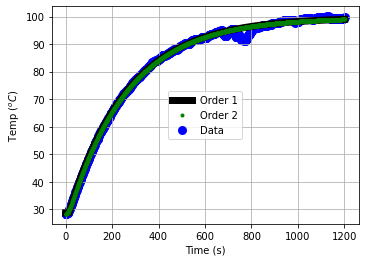

In [27]:
plt.figure(figsize=(5.5,4))
ax = plt.subplot(1,1,1)
ax.grid()
plt.scatter(ts, ym, color='blue', label='Data',linewidth = 3)
plt.plot(ts,Y_1orden,'k-',label='Order 1', linewidth = 7)
plt.plot(ts, Y_2orden,'g.',label='Order 2', linewidth =1)
plt.ylabel(r'Temp ($^oC$)')
plt.xlabel('Time (s)')
plt.legend(loc=10)
plt.savefig('ModelsOrder.png')
plt.show()

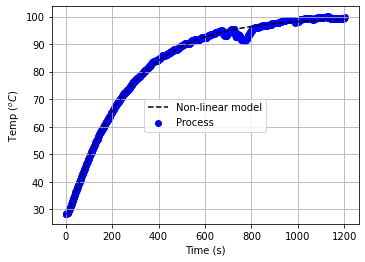

In [38]:
plt.figure(figsize=(5.5,4))
ax = plt.subplot(1,1,1)
ax.grid()
plt.scatter(ts, ym, color='blue', label='Process')
plt.plot(ts,Y_2orden,'k--',label='Non-linear model')
plt.ylabel(r'Temp ($^oC$)')
plt.xlabel('Time (s)')
plt.legend(loc=10)
plt.savefig('ModelsOrder.png')
plt.show()